# Proyek Analisis Data: Bike Sharing Dataset
- **Nama: STEVEN GONAWAN
- **Email: xvgonst@gmail.com
- **ID Dicoding: steven_gonawan_NDxe

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana perbandingan maksimum dan minimum jumlah peminjaman setiap harinya pada musim semi dan musim salju?
- Pertanyaan 2: Apakah hari kerja memiliki rata-rata peminjam terlisensi lebih banyak daripada hari libur?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plotter
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [2]:
#ambil data dari day.csv
days_data = pd.read_csv(r"C:data\day.csv", delimiter=",")
days_data.sample(n = 5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
632,633,2012-09-24,4,1,9,0,1,1,1,0.514167,0.502513,0.492917,0.142404,1001,6435,7436
169,170,2011-06-19,2,0,6,0,0,0,2,0.699167,0.645846,0.666667,0.102000,1639,3105,4744
723,724,2012-12-24,1,1,12,0,1,1,2,0.231304,0.258900,0.791304,0.077230,174,746,920
610,611,2012-09-02,3,1,9,0,0,0,2,0.696667,0.649000,0.815000,0.064071,2613,3197,5810
160,161,2011-06-10,2,0,6,0,5,1,1,0.755000,0.703292,0.605000,0.140554,815,3771,4586


In [3]:
#ambil data dari hour.csv
hours_data = pd.read_csv(r"data\hour.csv", delimiter=",")
hours_data.sample(n = 5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
14153,14154,2012-08-17,3,1,8,22,0,5,1,3,0.66,0.2424,0.83,0.1940,43,170,213
3649,3650,2011-06-05,2,0,6,23,0,0,0,1,0.62,0.5909,0.78,0.1343,25,61,86
1313,1314,2011-02-27,1,0,2,22,0,0,0,2,0.38,0.3939,0.62,0.1045,2,67,69
11855,11856,2012-05-14,2,1,5,4,0,1,1,2,0.54,0.5152,0.77,0.2239,3,3,6
16223,16224,2012-11-13,4,1,11,17,0,2,1,1,0.34,0.3030,0.49,0.3582,33,575,608


**Insight:**
- Data yang diambil adalah day.csv dan hour.csv
- Untuk membaca kedua file tersebut, digunakan pd.read_csv()

### Assessing Data

In [4]:
#cek data duplikat untuk days_data
days_data.duplicated().sum()

0

In [5]:
#cek data null value untuk days_data
days_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
#cek data duplikat untuk hours_data
hours_data.duplicated().sum()

0

In [7]:
#cek data null value untuk hours_data
hours_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- Mengecek apakah ada data duplikat atau null yang dapat dilihat tidak ada hasil duplikat atau null.
- gunakan .isnull() dan .duplicated() untuk mengecek.

### Cleaning Data

In [8]:
#drop kolom weathersit, temp, atemp, hum, windspeed pada filtered_days_data
filtered_days_data = days_data.drop(columns=["weathersit", "temp", "atemp", "hum", "windspeed"])
filtered_days_data.sample(n = 10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,casual,registered,cnt
403,404,2012-02-08,1,1,2,0,3,1,109,2693,2802
40,41,2011-02-10,1,0,2,0,4,1,47,1491,1538
397,398,2012-02-02,1,1,2,0,4,1,190,3571,3761
285,286,2011-10-13,4,0,10,0,4,1,290,2623,2913
436,437,2012-03-12,1,1,3,0,1,1,838,4460,5298
649,650,2012-10-11,4,1,10,0,4,1,834,6736,7570
157,158,2011-06-07,2,0,6,0,2,1,763,4070,4833
72,73,2011-03-14,1,0,3,0,1,1,359,1687,2046
253,254,2011-09-11,3,0,9,0,0,0,1633,3413,5046
90,91,2011-04-01,2,0,4,0,5,1,307,1920,2227


In [9]:
#konversi dteday yang (####) menjadi format date-time yang benar untuk filtered_days_data
#asal:
print(filtered_days_data["dteday"].dtype)

#akhir:
filtered_days_data["dteday"] = pd.to_datetime(filtered_days_data["dteday"])
filtered_days_data.sample(n=10)
print(filtered_days_data["dteday"].dtype)

object
datetime64[ns]


In [10]:
#drop kolom weathersit, temp, atemp, hum, windspeed pada filtered_days_data
filtered_hours_data = hours_data.drop(columns=["weathersit", "temp", "atemp", "hum", "windspeed"])
filtered_hours_data.sample(n = 10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,casual,registered,cnt
1429,1430,2011-03-04,1,0,3,20,0,5,1,9,78,87
3601,3602,2011-06-03,2,0,6,23,0,5,1,30,141,171
17361,17362,2012-12-31,1,1,12,6,0,1,1,0,40,40
4318,4319,2011-07-03,3,0,7,20,0,0,0,83,93,176
10478,10479,2012-03-17,1,1,3,17,0,6,0,291,357,648
13130,13131,2012-07-06,3,1,7,7,0,5,1,20,333,353
5372,5373,2011-08-16,3,0,8,18,0,2,1,54,516,570
5795,5796,2011-09-03,3,0,9,22,0,6,0,66,96,162
13952,13953,2012-08-09,3,1,8,13,0,4,1,80,201,281
12173,12174,2012-05-27,2,1,5,10,0,0,0,209,215,424


In [11]:
#konversi dteday yang (####) menjadi format date-time yang benar untuk filtered_hours_data
#asal:
print(filtered_hours_data["dteday"].dtype)

#akhir:
filtered_hours_data["dteday"] = pd.to_datetime(filtered_hours_data["dteday"])
filtered_hours_data.sample(n=10)
print(filtered_hours_data["dteday"].dtype)

object
datetime64[ns]


**Insight:**
1. Menghilangkan kolom yang tidak dipakai.
2. Memperbaiki dteday yang berbentuk objek (dikarenakan format salah) dan konversi jadi datetime64.

## Exploratory Data Analysis (EDA)

### Explore ...

In [12]:
#groupby() untuk filtered_days_data (pertanyaan no.1)
minmaxD_data = filtered_days_data.groupby(by="season").agg({
    "instant": "nunique",
    "cnt": ["max", "min"]
})

#print
minmaxD_data

instant   cnt      
       nunique   max   min
season                    
1          181  7836   431
2          184  8362   795
3          188  8714  1115
4          178  8555    22

In [13]:
#groupby() untuk filtered_days_data (pertanyaan no.2)
borrowerD_data = filtered_days_data.groupby(by="workingday").agg({
    "instant": "nunique",
    "registered": "mean",
    "casual": "mean"
})

#print
borrowerD_data

,instant,registered,casual
workingday,,,
0,231,2959.034632,1371.134199
1,500,3978.250000,606.570000


In [14]:
#groupby() untuk filtered_hourss_data (pertanyaan no.1)
minmaxH_data = filtered_hours_data.groupby(by="season").agg({
    "instant": "nunique",
    "cnt": ["max", "min"]
})

#print
minmaxH_data

instant  cnt    
       nunique  max min
season                 
1         4242  801   1
2         4409  957   1
3         4496  977   1
4         4232  967   1

In [15]:
#groupby() untuk filtered_hours_data (pertanyaan no.2)
borrowerH_data = filtered_hours_data.groupby(by="workingday").agg({
    "instant": "nunique",
    "registered": "mean",
    "casual": "mean"
})

#print
round(borrowerH_data)

,instant,registered,casual
workingday,,,
0,5514,124.0,57.0
1,11865,168.0,26.0


**Insight:**
- Untuk pertanyaan (1) diperlukan perbandingan antara peminjaman paling tinggi dan rendah (min/max) sedangkan pertanyaan (2) diperlukan mencari mean dari peminjam terlisensi dan peminjam kasual.
- Untuk ini, digunakan .groupby() dengan by="" tergantung kebutuhan yang menjadi anchor point atau dasar yang akan dibandingkan.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

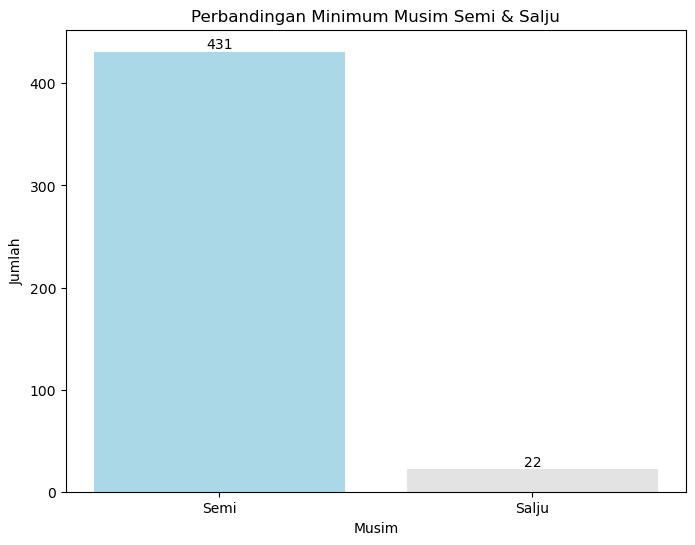

In [52]:
#store dalam value
filtered_min_values = minmaxD_data.loc[[1, 4], ("cnt", "min")]

#buat bar chart
plt.figure(figsize=(8, 6))
plt.bar(["Semi", "Salju"], filtered_min_values, color=["#ABD8E6", "#E3E3E3"])

#dekorasi bar chart
for i, value in enumerate(filtered_min_values):
    plt.text(i, value + 0.1, str(round(value, 2)), ha="center", va="bottom")
plt.title("Perbandingan Minimum Musim Semi & Salju")
plt.xlabel("Musim")
plt.ylabel("Jumlah")

#show bar
plt.show()


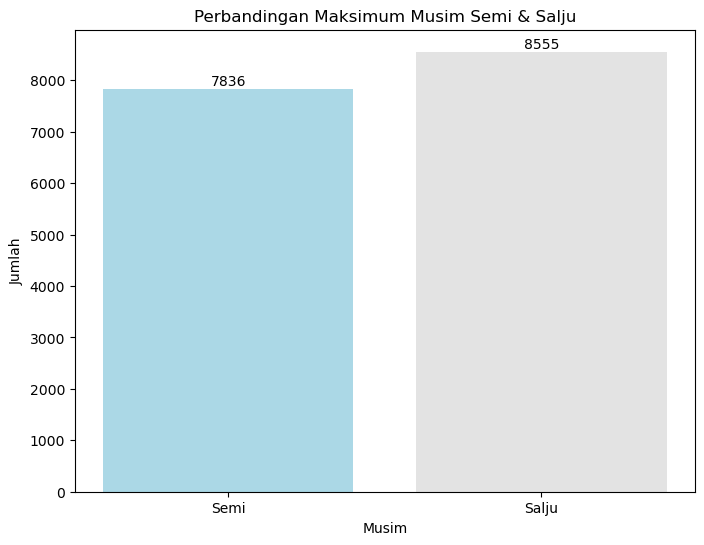

In [53]:
#store dalam value
filtered_max_values = minmaxD_data.loc[[1, 4], ("cnt", "max")]

#buat bar chart
plt.figure(figsize=(8, 6))
plt.bar(["Semi", "Salju"], filtered_max_values, color=["#ABD8E6", "#E3E3E3"])

#dekorasi bar chart
for i, value in enumerate(filtered_max_values):
    plt.text(i, value + 0.1, str(round(value, 2)), ha="center", va="bottom")
plt.title("Perbandingan Maksimum Musim Semi & Salju")
plt.xlabel("Musim")
plt.ylabel("Jumlah")

#show bar
plt.show()

### Pertanyaan 2:

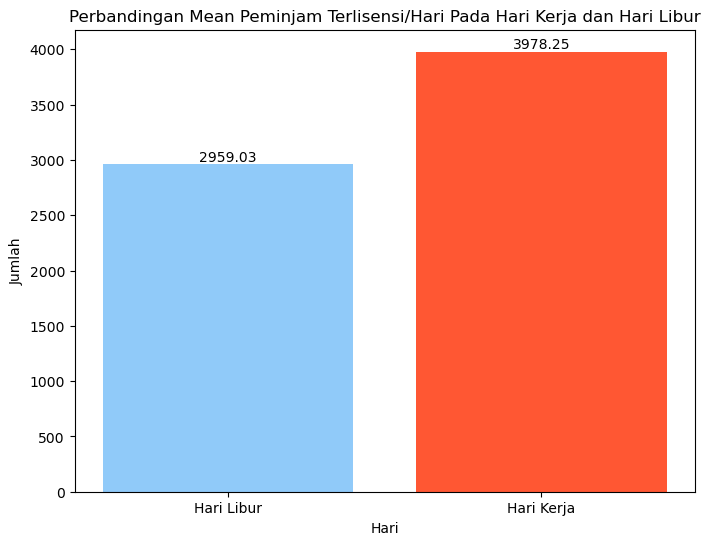

In [47]:
#store dalam value
filtered_borrower_values = borrowerD_data.loc[[0, 1], ("registered")]

#buat bar chart
plt.figure(figsize=(8, 6))
plt.bar(["Hari Libur", "Hari Kerja"], filtered_borrower_values, color=["#90CAF9", "#FF5733"])

#dekorasi bar chart
for i, value in enumerate(filtered_borrower_values):
    plt.text(i, value + 0.1, str(round(value, 2)), ha="center", va="bottom")
plt.title("Perbandingan Mean Peminjam Terlisensi/Hari Pada Hari Kerja dan Hari Libur")
plt.xlabel("Hari")
plt.ylabel("Jumlah")

#show bar
plt.show()

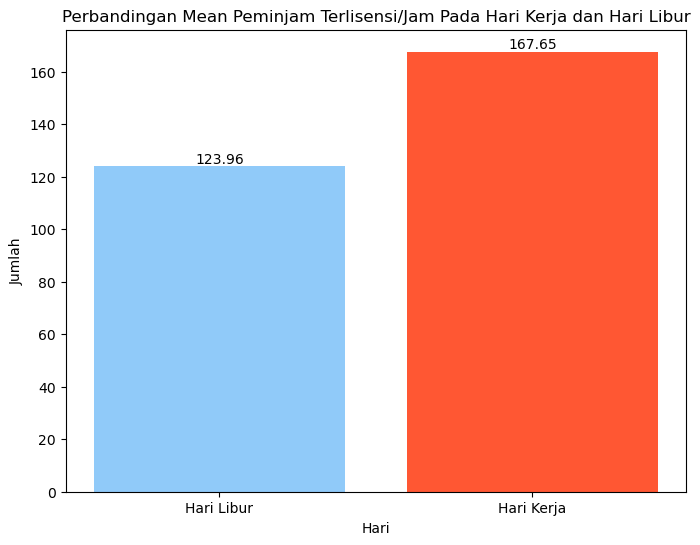

In [48]:
#store dalam value
filtered_borrower_values = borrowerH_data.loc[[0, 1], ("registered")]

#buat bar chart
plt.figure(figsize=(8, 6))
plt.bar(["Hari Libur", "Hari Kerja"], filtered_borrower_values, color=["#90CAF9", "#FF5733"])

#dekorasi bar chart
for i, value in enumerate(filtered_borrower_values):
    plt.text(i, value + 0.1, str(round(value, 2)), ha="center", va="bottom")
plt.title("Perbandingan Mean Peminjam Terlisensi/Jam Pada Hari Kerja dan Hari Libur")
plt.xlabel("Hari")
plt.ylabel("Jumlah")

#show bar
plt.show()

**Insight:**
- Untuk pertanyaan (1) tidak bisa menggunakan data hour.csv karena untuk menghitung min, diperlukan sebuah peminjaman yang dikalkulasikan lebih dari 1 karena setiap peminjaman mulai dari 1 sehingga hanya bisa menggunakan day.csv atau kesimpulan dari hour.csv yang dikompakkan. (instansi sebanyak n hari itu dibuat menjadi 1)
- Untuk pertanyaan (2) bisa menggunakan keduanya karena jika keduanya memiliki perbandingan yang sama. (misal x > y pada hour.csv, maka x > y juga lebih besar pada day.csv)

## Conclusion

- Pertanyaan (1): minimum musim salju lebih sedikit daripada minimum musim semi, sedangkan maksimum musim salju lebih besar daripada maksimum musim semi.
- Peminjam terlisensi pada hari kerja lebih banyak daripada peminjam kasual, sedangkan peminjam terlisensi pada hari libur lebih sedikit daripada peminjam kasual.